1000
[0.531      0.5105     0.516      0.51575    0.511      0.50683333
 0.50157143 0.49825    0.497      0.4995     0.50081818 0.50283333
 0.503      0.50385714 0.504      0.503875   0.50364706 0.50427778
 0.50494737 0.5054     0.50571429 0.50627273 0.50665217 0.50645833
 0.50592    0.50557692 0.50522222 0.50625    0.50631034 0.50603333
 0.50567742 0.50546875 0.50572727 0.50476471 0.50348571 0.50372222
 0.50367568 0.50357895 0.50382051 0.5045     0.50446341 0.50445238
 0.50393023 0.50440909 0.50437778 0.50443478 0.50493617 0.50514583
 0.50553061 0.50552    0.50588235 0.50557692 0.50560377 0.5052963
 0.50530909 0.50546429 0.50531579 0.50532759 0.50528814 0.5058
 0.50585246 0.50579032 0.50528571 0.505375   0.5054     0.50569697
 0.5059403  0.50617647 0.50607246 0.5059     0.50585915 0.50583333
 0.50583562 0.50583784 0.50613333 0.50627632 0.50632468 0.5060641
 0.50616456 0.50585    0.50611111 0.50629268 0.50625301 0.50603571
 0.50588235 0.50612791 0.50649425 0.50661364 0.50667416 0.50647

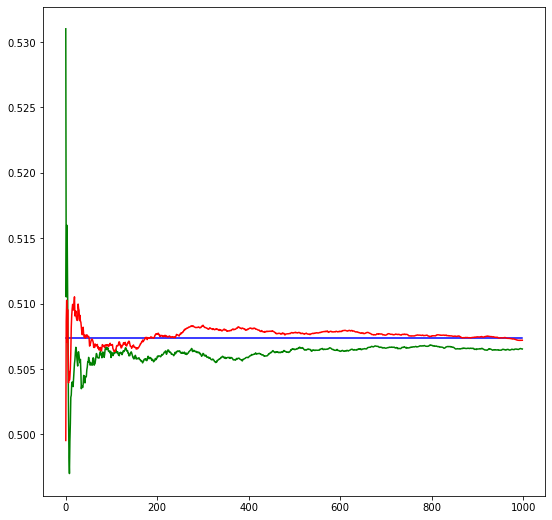

In [7]:
import sys
import struct
import ctypes
import numpy as np

from matplotlib import pyplot as plt

class pointStruct(ctypes.Structure):
    _fields_ = [('theoryResult', ctypes.c_double),
                ('valueCount', ctypes.c_int),                
                ('simpleValues', ctypes.POINTER(ctypes.c_double)),
                ('fastValues', ctypes.POINTER(ctypes.c_double))]
    
mydll = ctypes.cdll.LoadLibrary(r".\Documents\GitHub\RedundantSystemEstimation\x64\Debug\modPythonGate.dll")
getDataFunc = mydll.getData
mydll.getData.restype = ctypes.POINTER(pointStruct)
mydll.getData.argtypes = [ctypes.c_double, ctypes.c_double, ctypes.c_double]

ret = getDataFunc(1.0, 5.0, 5.0)

theoryResult = ret.contents.theoryResult
count = ret.contents.valueCount
simpleValues_array_pointer = ctypes.cast(ret.contents.simpleValues, ctypes.POINTER(ctypes.c_double * count))
simpleValues = np.frombuffer(simpleValues_array_pointer.contents, dtype = ctypes.c_double)
fastValues_array_pointer = ctypes.cast(ret.contents.fastValues, ctypes.POINTER(ctypes.c_double * count))
fastValues = np.frombuffer(fastValues_array_pointer.contents, dtype = ctypes.c_double)

print(count)
print(simpleValues)
print(fastValues)

fig = plt.figure(figsize = (9, 9))

iterations = [i for i in range(count)]

theory = [theoryResult for i in range(count)]

plt.plot(iterations[0:count-1], theory[0:count-1], color = 'b')
plt.plot(iterations[0:count-1], simpleValues[0:count-1], color = 'g')
plt.plot(iterations[0:count-1], fastValues[0:count-1], color = 'r')

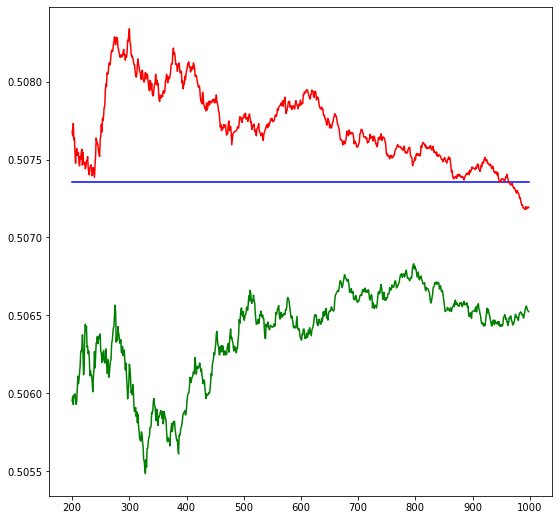

In [8]:
fig = plt.figure(figsize = (9, 9))

countSmall = 1000
start = 200
end = 1000

iterations = [i for i in range(countSmall)]

theory = [0.507359 for i in range(countSmall)]

plt.plot(iterations[start:end-1], theory[start:end-1], color = 'b')
plt.plot(iterations[start:end-1], simpleValues[start:end-1], color = 'g')
plt.plot(iterations[start:end-1], fastValues[start:end-1], color = 'r')